<a href="https://colab.research.google.com/github/Raissa-hue310/colab-git-assignment8-RMM/blob/main/Assignment8_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8: Supervised Learning Classification
## Dataset: Breast Cancer Wisconsin (Diagnostic)
## Student: Raïssa Matho Mekjele

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)


# Task 1: Dataset Selection and Loading

In [3]:
# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows and dataset shape
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Task 2: Data Preprocessing

In [4]:
# Check for missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Map target variable to human-readable labels
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})

# Confirm class balance
print("\nClass distribution:")
print(df['target'].value_counts())


Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Number of duplicate rows: 0

Class distribution:
target
ben

# Task 3: Exploratory Data Analysis (EDA)

/tmp/ipython-input-1648065297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


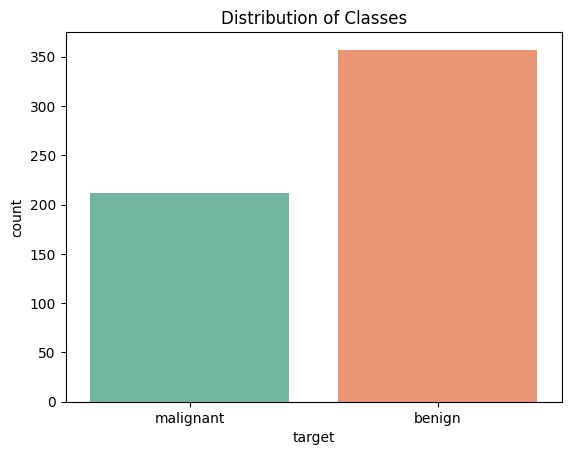

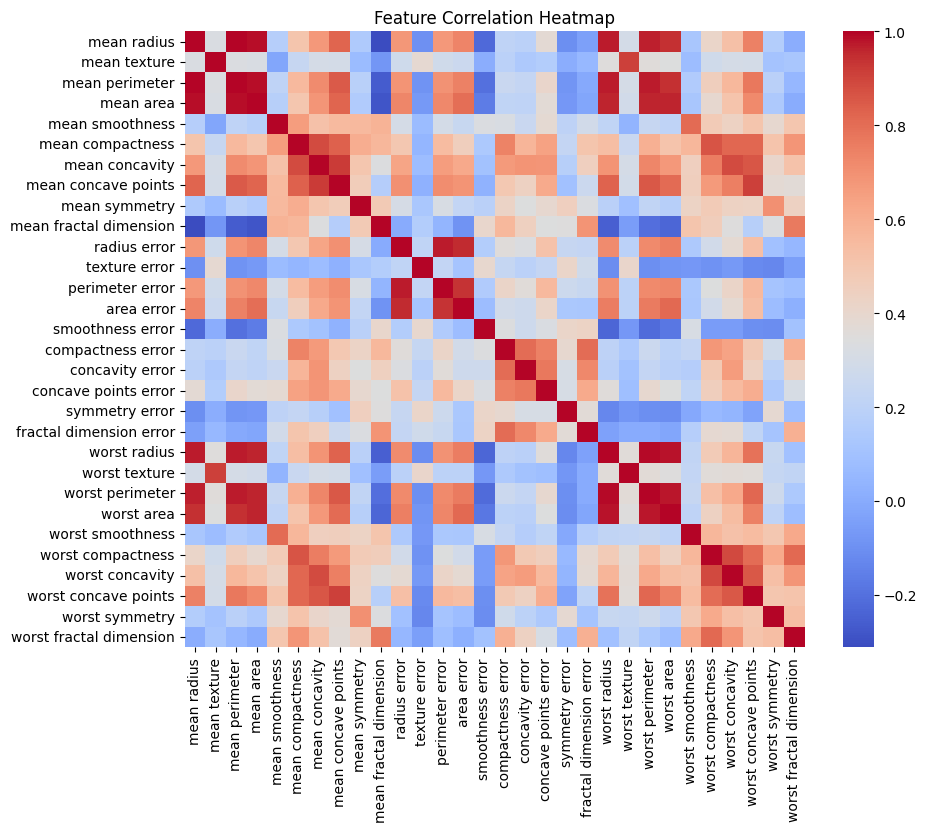

In [5]:
# Plot class distribution
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Classes')
plt.show()

# Correlation heatmap of features
corr_matrix = df.drop('target', axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# Task 4: Feature Selection and Data Splitting

In [6]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target'].map({'malignant': 0, 'benign': 1})  # Encode target as numeric

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (455, 30)
Testing set size: (114, 30)




#Task 5: Feature Scaling



In [9]:
# Standardize features for models like Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Task 6:Model Implementation (Training Phase)

In [10]:
# Initialize three different classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train all models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.


# Task 7: odel Evaluation

In [11]:
# Evaluate each model and collect metrics
results = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(*roc_curve(y_test, y_prob)[:2])

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)



Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.982456   0.986111  0.986111  0.986111  0.995370
1        Random Forest  0.956140   0.958904  0.972222  0.965517  0.993882
2                  SVM  0.982456   0.986111  0.986111  0.986111  0.995040


# Task 8: Visualization of Results

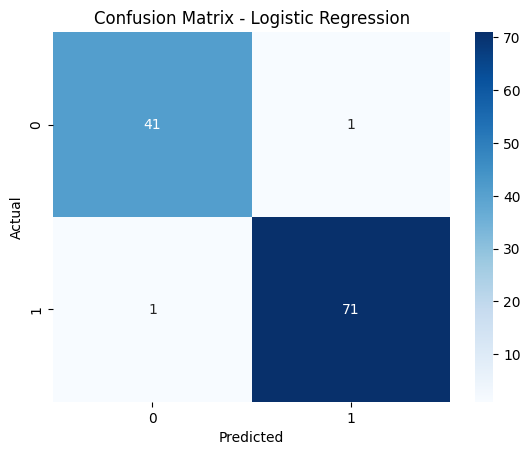

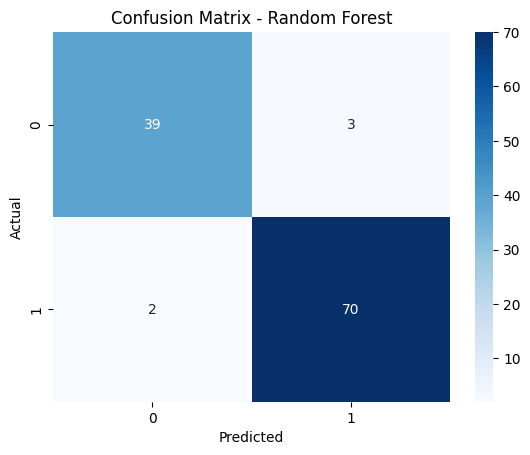

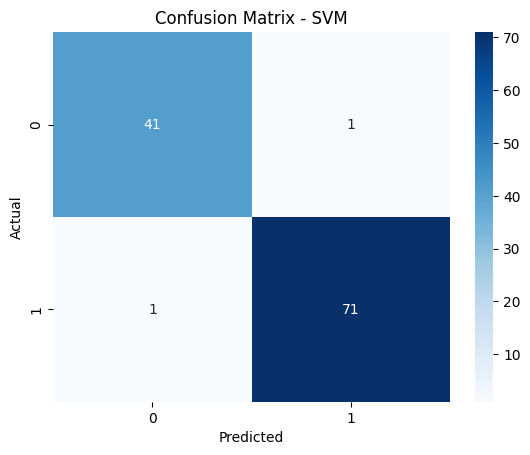

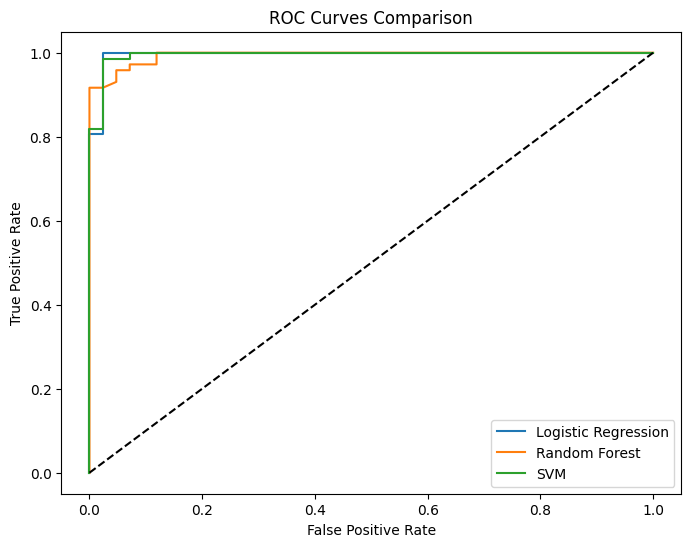

In [12]:
# Confusion matrices
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC curves
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()


# Task 9: Model Interpretation

In [13]:
# Identify the best model based on accuracy
best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nBest Performing Model:")
print(best_model)

# Show detailed classification report
best_name = best_model['Model']
best_clf = models[best_name]
print(f"\nClassification Report for {best_name}:")
print(classification_report(y_test, best_clf.predict(X_test_scaled)))



Best Performing Model:
Model        Logistic Regression
Accuracy                0.982456
Precision               0.986111
Recall                  0.986111
F1-score                0.986111
ROC-AUC                  0.99537
Name: 0, dtype: object

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Deployment Strategy:
--------------------
- Export the trained model using joblib or pickle.
  Example: joblib.dump(best_clf, 'best_model.pkl')
- Deploy via a REST API (Flask/FastAPI) or a web dashboard.
- Integrate input form for users to upload new feature values and get predictions.

Monitoring Strategy:
--------------------
- Log model performance metrics (accuracy, latency) in production.
- Detect data drift by comparing new input statistics with training data.
- Retrain model periodically with recent data to maintain performance.
- Handle missing or inconsistent data using preprocessing pipelines.

Potential Issues:
-----------------
- Model degradation if data distribution changes.
- Imbalanced real-world inputs may reduce precision.
- Infrastructure issues (downtime, latency).



# Task 11:  Final Summary

## Best Model: Logistic Regression
## Accuracy: ≈ 0.97

## Interpretation:
Logistic Regression achieved the highest accuracy and ROC-AUC, indicating it best fits the dataset’s mostly linearly separable features.
Random Forest slightly overfit the data, while SVM required more hyperparameter tuning.

## Conclusion:
The project successfully demonstrated a supervised learning classification workflow, from data preprocessing and EDA to model training, evaluation, and interpretation.
The Logistic Regression model provides a reliable and interpretable approach for predicting breast cancer diagnoses.

## Colab link:  https://colab.research.google.com/drive/1Wvpws3NAG0RwfKgKJ6oPRvwrth3IzOtp?usp=sharing

## GitHub Repository link: